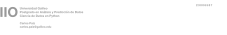

In [1]:
# This allows to show images in the notebook
from IPython.display import SVG

SVG(filename='../res/iio-header-w.svg')

# Laboratorio No. 3: Análisis de datos con Python

## Parte I. Numpy

Para los ejercicios siguiente genere el código que considere para resolver el problema que se le plantea.

In [24]:
import numpy as np

1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [7]:
# Se define un array de unos que representan nuestro valor True
ar01 = np.ones(1000, dtype=bool)

# Se obtiene el tamaño en bytes utlizando nbytes de Numpy
print(f"El tamaño del arreglo es {ar01.nbytes}")

El tamaño del arreglo es 1000


2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [8]:
# Se crea un array de números enteros pares en orden decreciente
ar02 = np.arange(100,0,-2)

# Se imprimen los últimos 10 elemento del array
print(f"Los últimos 10 elementos son: {ar02[-10:]}")

Los últimos 10 elementos son: [20 18 16 14 12 10  8  6  4  2]


3. Dado el array [[2 4 5 6] [0 3 7 4] [8 8 5 2] [1 5 6 1]]. Seleccione con una instrucción el subarray de elementos [0 3 7 4]. Después, seleccione el subarray de elementos [[2 5] [8 5]]

In [9]:
# Se crea el array
ar03 = np.array([[2, 4, 5, 6],
                [0, 3, 7, 4],
                [8, 8, 5, 2],
                [1, 5, 6, 1]])

# Se selecciona el sub array [0 3 7 4]
subar01 = ar03[1:2, :]

# Se imprime el sub array [0 3 7 4]
print(f"El sub array 01 es: {subar01}")

# Se selecciona el sub array [[2 5] [8 5]]
subar02 = ar03[[0, 2], :][:, [0, 2]]

# Se imprime el sub array [[2 5] [8 5]]
print(f"El sub array 01 es: {subar02}")

El sub array 01 es: [[0 3 7 4]]
El sub array 01 es: [[2 5]
 [8 5]]


4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [11]:
# Dados los arrays
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

# Se calcula la diferencia
diff = a - b
print(f"La diferencia es: {diff}")

# Se calcula la media aritmetica
mean = np.mean(diff)
print(f"La media es: {mean}")

La diferencia es: [ 0  1  0 -2]
La media es: -0.25


5. Tengo valores de cordenadas (x, y) en las columnas del array [[1.33 4.5] [30.0 10.7] [70.2 0.5]]. Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [14]:
# Se crea el array original
ar04 = np.array([[1.33, 4.5],
                [30.0, 10.7],
                [70.2, 0.5]])

# Se agrega una nueva fila utilizando la función append de numpy y sobre el eje 0
ar04 = np.append(ar04, [np.array([37.1,-3.6])], axis=0)

# Se imprime el nuevo array
print(f"El nuevo array es: {ar04}")

# Se imprime la dimensión del array
print(f"La dimensión del array es: {ar04.shape}")

El nuevo array es: [[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]
La dimensión del array es: (4, 2)


6. Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [21]:
# Se transpone el array usando la función T
ar04_transp = ar04.T

# Se agregan los nuevos pares de coordenadas
new_rows = np.array([[10.8, 3.0],
                     [35.8, 12.0]])

ar05 = np.concatenate((ar04_transp, new_rows.T), axis=1)

# Se imprime el nuevo array
print(f"El nuevo array es: {ar05}")

# Se imprime la dimensión del array
print(f"La dimensión del array es: {ar05.shape}")

El nuevo array es: [[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]
La dimensión del array es: (2, 6)


## Parte II. Exploración y minería de datos

Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/NucleosPoblacion.csv')

df.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


1. ¿Cuántos municipios tienen más de 100000 habitantes?.

In [32]:
# Se filtra el dataframe
df1 = df[df['Poblacion']>100000]

# Se imprime el número total de municipios con más habitantes
print(f"Total de municipios con población mayor a 100mil habitantes: {len(df1)}")

Total de municipios con población mayor a 100mil habitantes: 62


2. Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayor y responda:

    a) ¿Cuál es la segunda ciudad más poblada?
b) ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

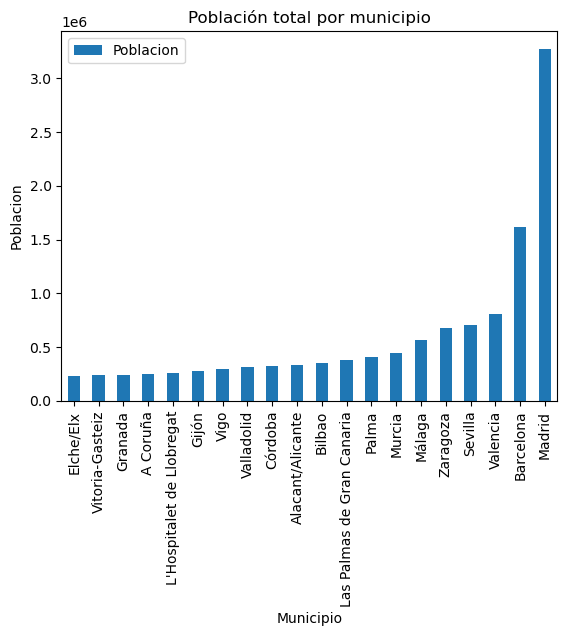

In [47]:
# Orderna por población en forma ascedente
df2 = df.sort_values(by='Poblacion', ascending=True)

# Se obtienen los últimos 20 registros con mayor poblacion
df_top20 = df2.tail(20)

ax = df_top20.plot.bar(x='Municipio', y='Poblacion', rot=0)

# Set the axis labels and title
ax.set_xlabel('Municipio')
ax.set_ylabel('Poblacion')
ax.set_title('Población total por municipio')
ax.set_xticklabels(df_top20['Municipio'], rotation=90)
plt.show()

In [49]:
# Segundo municipio más poblado
city = df_top20.iloc[-2]['Municipio']

# Se imprime el segundo municipio más pobado
print(f"La segunda ciudad más poblada es: {city}")

La segunda ciudad más poblada es: Barcelona


In [57]:
# Se reinicia el index para el dataframe ordenado en forma ascendente
df2 = df.sort_values(by='Poblacion', ascending=True).reset_index(drop=True)

# Obtener la posición de la ciudad 'Granada'
pos = df2.loc[df2['Municipio'] == 'Granada'].index[0]+1

# Se imprime la la posición del ranking
print(f"La posición de Granada en el ranking es: {pos}")

La posición de Granada en el ranking es: 835


3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?

In [80]:
# Se filtran los municipios de Extremadura
# Según Wikipedia, Extremadura está compuesta por las provincias de Badajoz y Cáceres
df_extremadura = df[(df['Provincia'] == 'Cáceres') | (df['Provincia'] == 'Badajoz')]

# Se filtra por número de habitantes
df_extremadura_population = df_extremadura[df_extremadura['Poblacion'] > 5000]

# Se imprime el resultado
print(f"El total de municipios de Extremadura con más de 5000 habitantes es: {len(df_extremadura_population)}")

El total de municipios de Extremadura con más de 5000 habitantes es: 14


4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [90]:
# Se obtiene el índice del registro con mayor latitud
idxmax_lat = df['Y'].idxmax()

# Se obtienen los datos del municipio
northmost_city = df.loc[idxmax_lat,'Municipio']
prov = df.loc[idxmax_lat,'Provincia']
population = df.loc[idxmax_lat,'Poblacion']

print(f"La ciudad más al norte es {northmost_city} de la provincia de {prov} con {population} habitantes")

La ciudad más al norte es Viveiro de la provincia de Lugo con 16211.0 habitantes


5. Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [94]:
df_granada = df[df['Provincia'] == 'Granada']

df_granada['Poblacion'].describe()

count        20.000000
mean      30217.850000
std       50355.491715
min       10386.000000
25%       13146.500000
50%       17526.000000
75%       21739.750000
max      239154.000000
Name: Poblacion, dtype: float64

6. Realice un histograma con la población de los Municipios para cada una de las provincias.

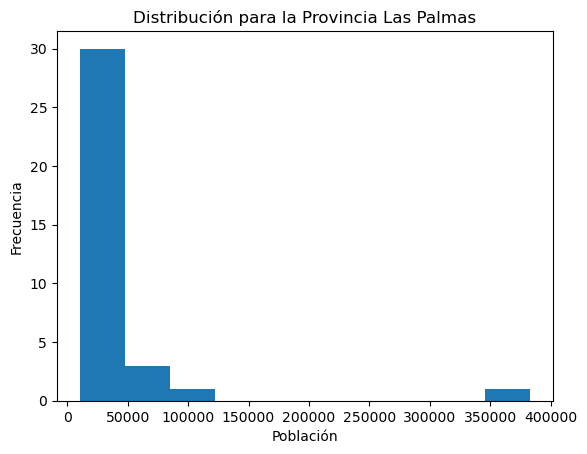

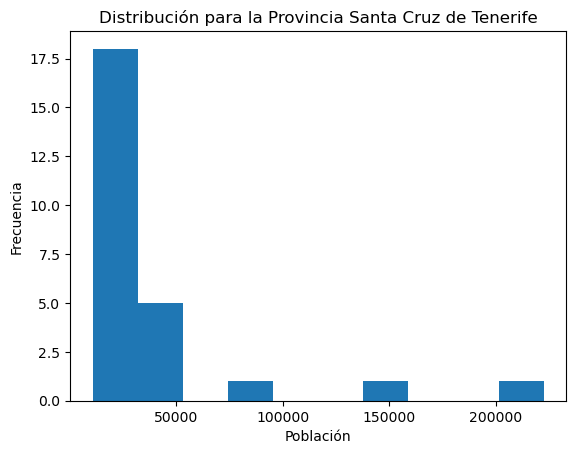

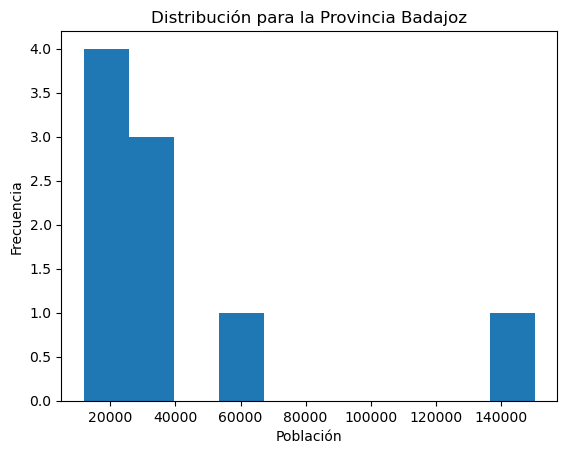

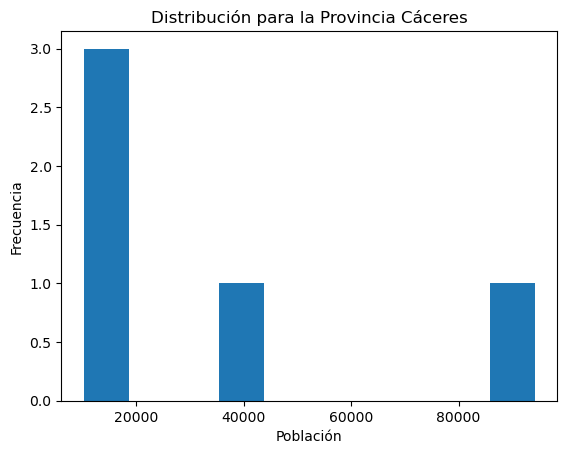

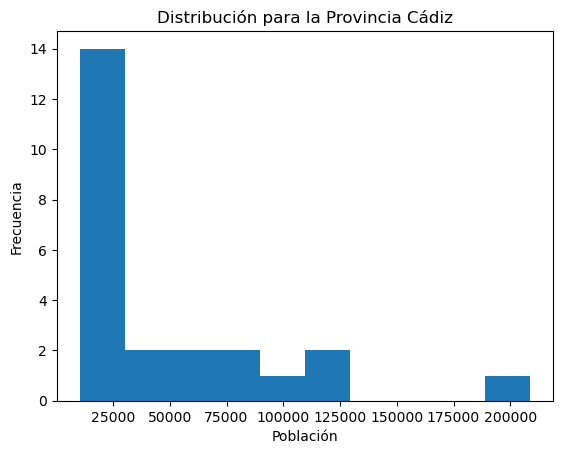

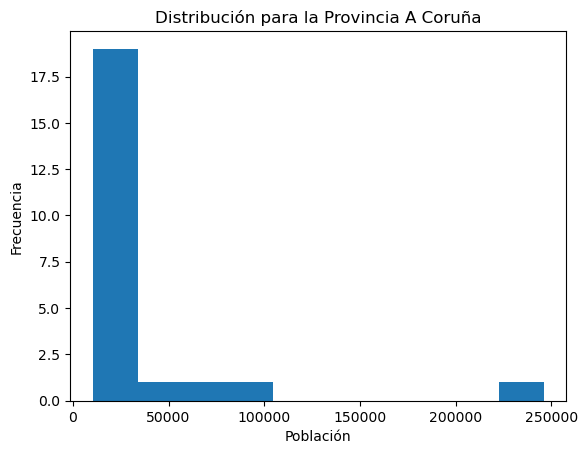

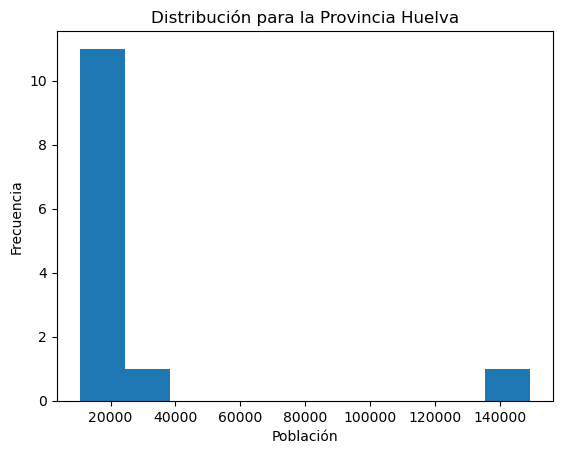

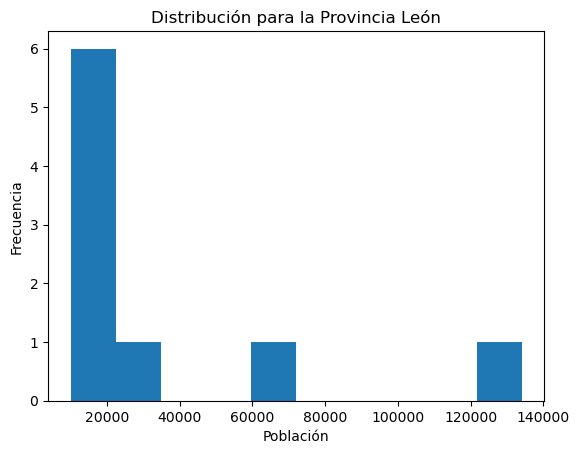

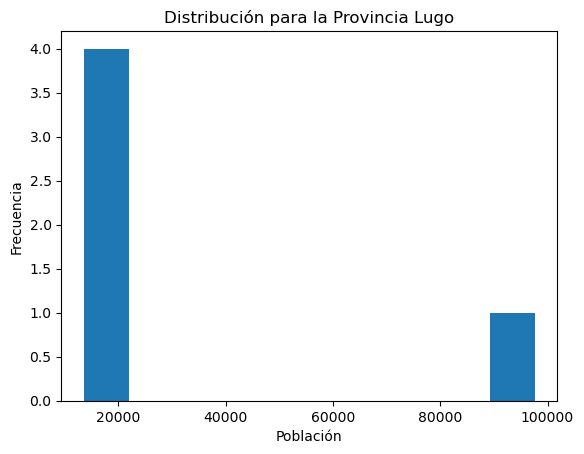

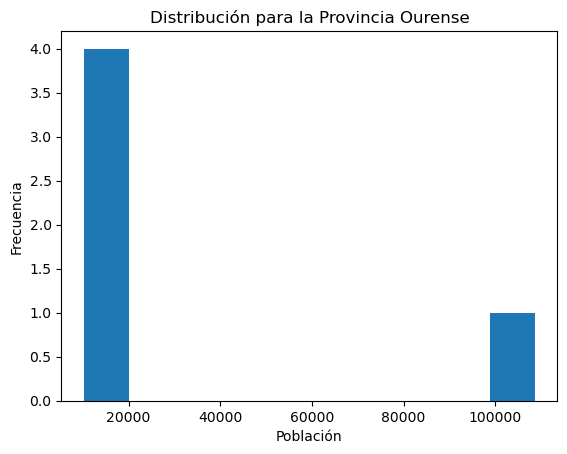

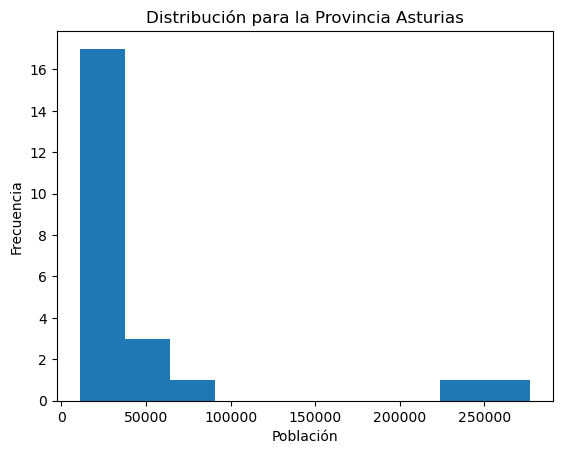

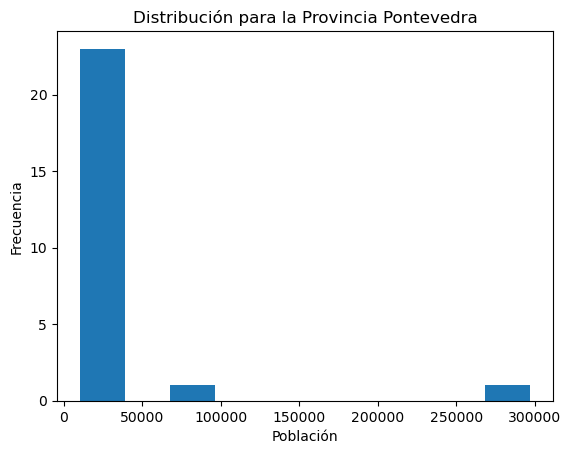

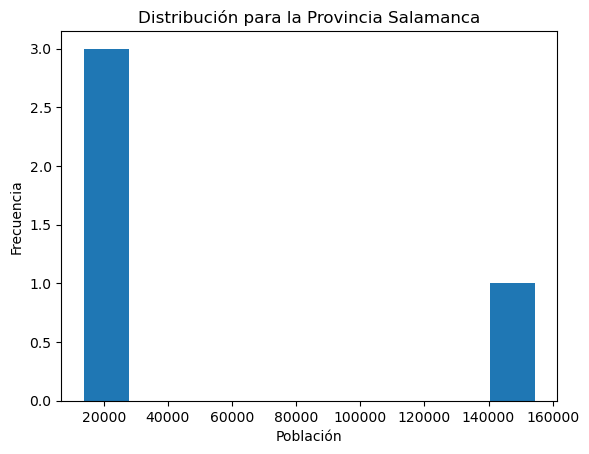

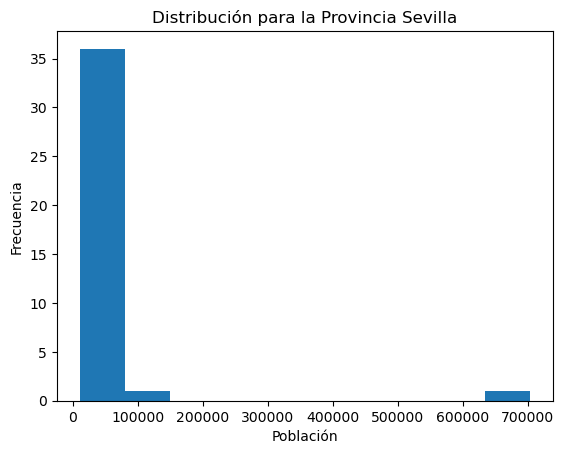

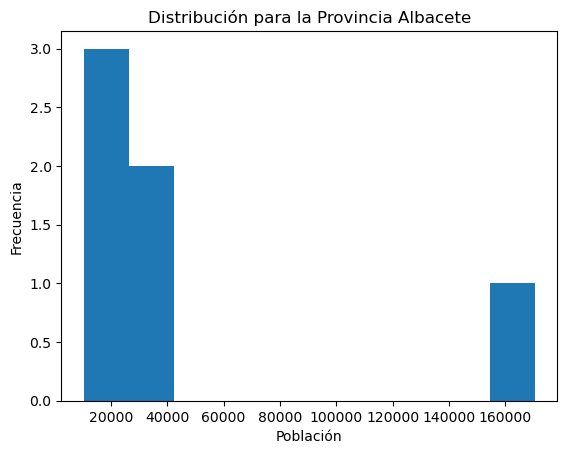

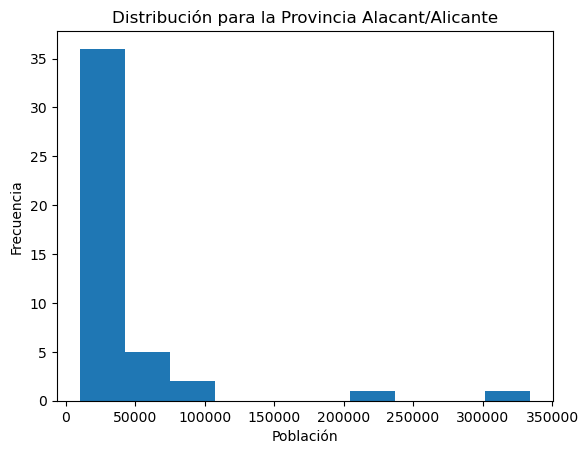

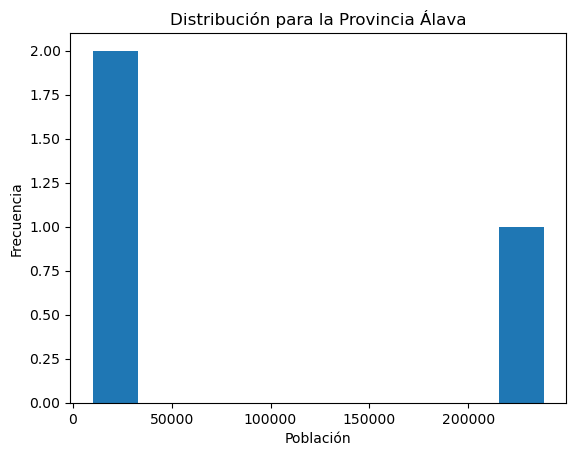

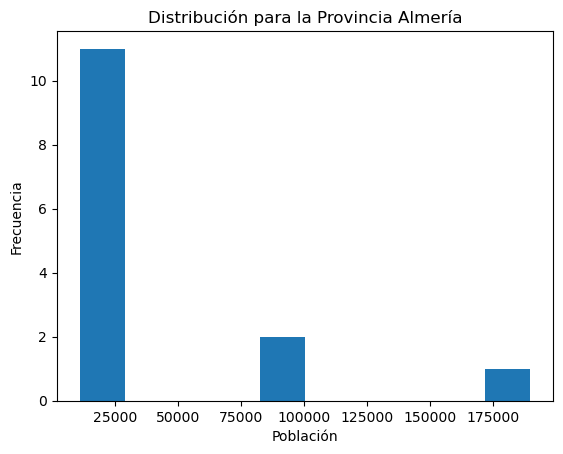

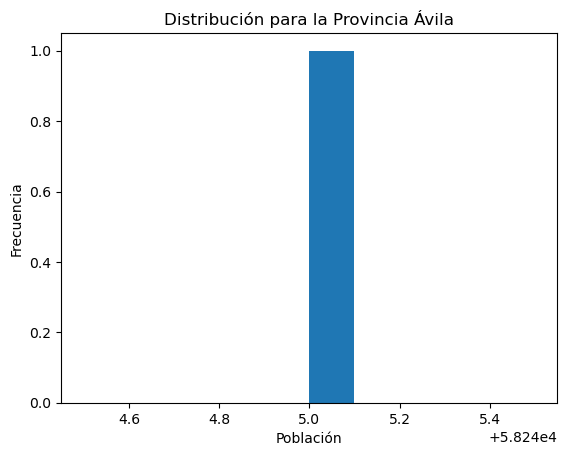

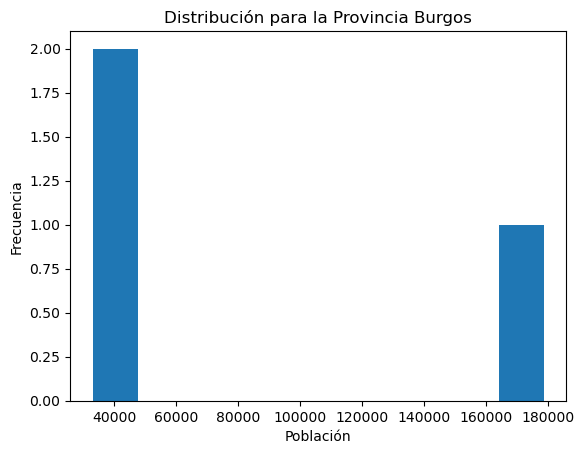

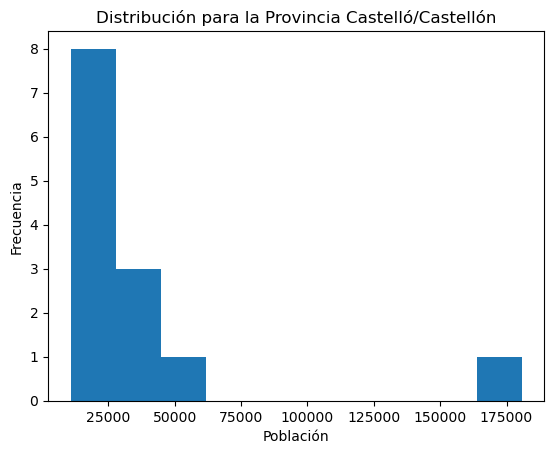

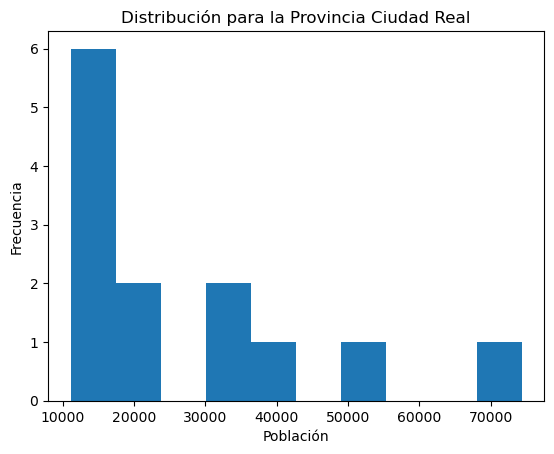

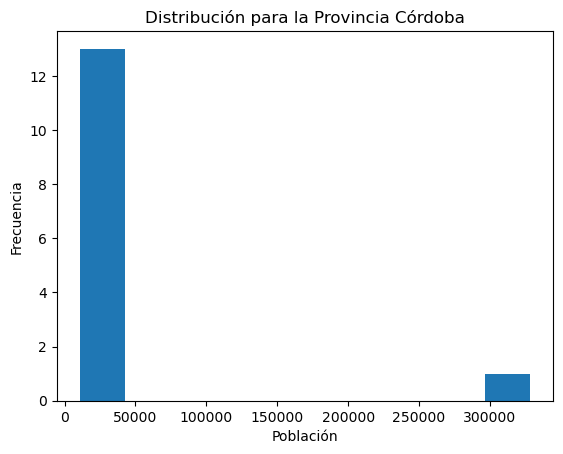

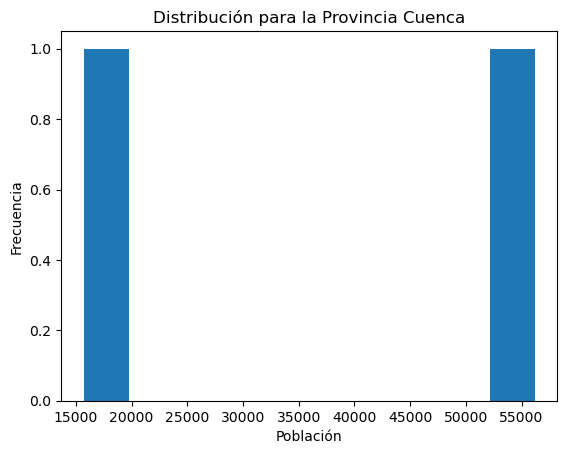

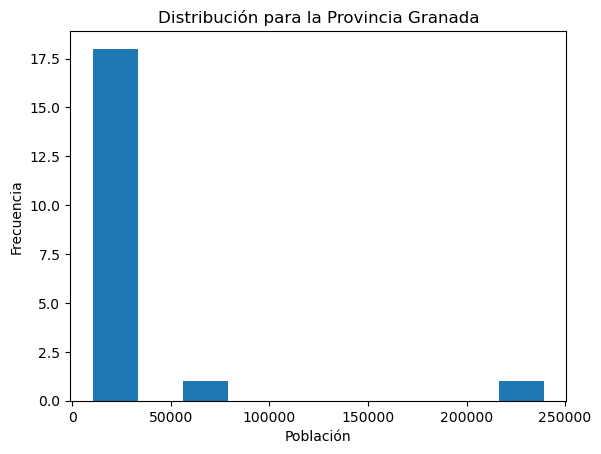

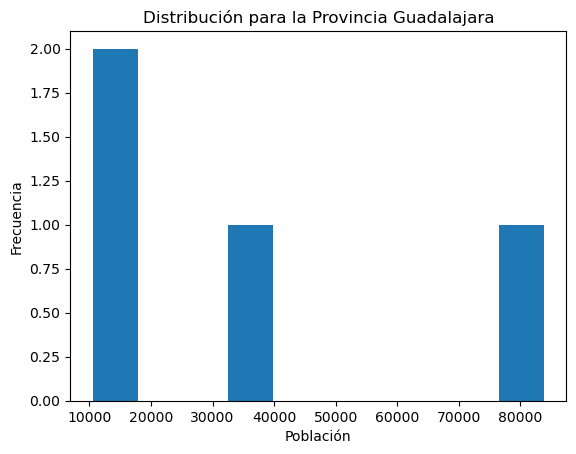

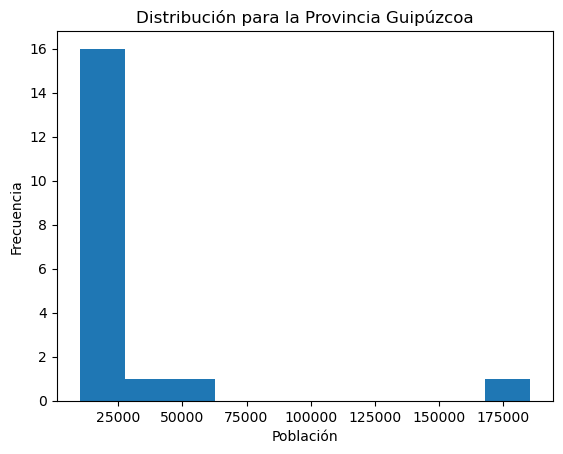

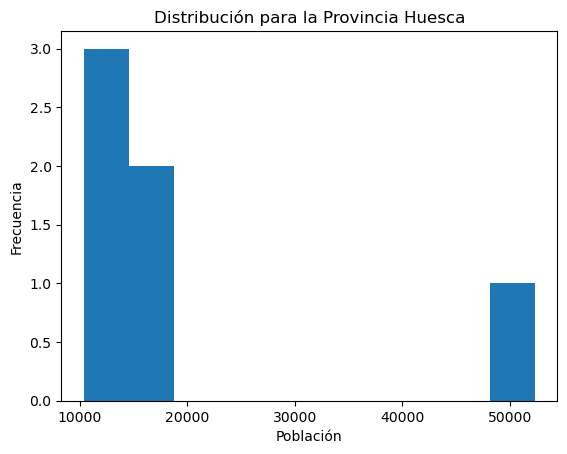

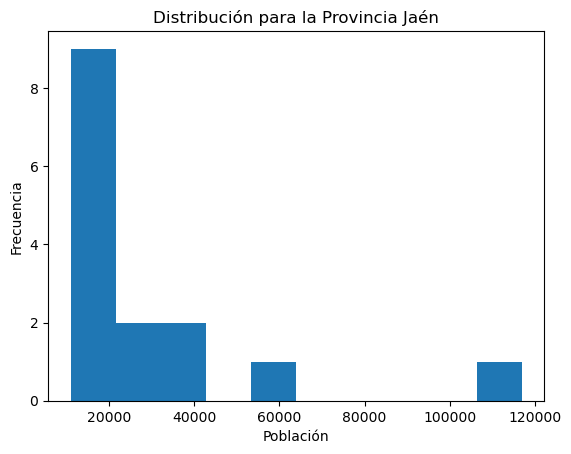

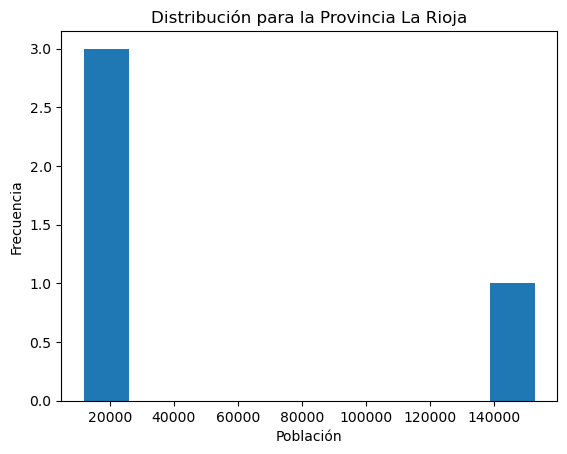

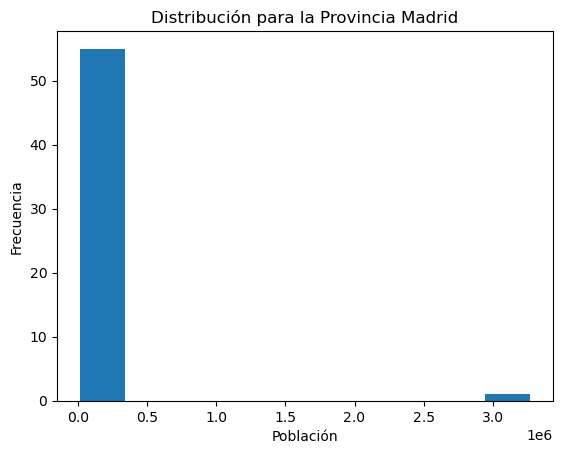

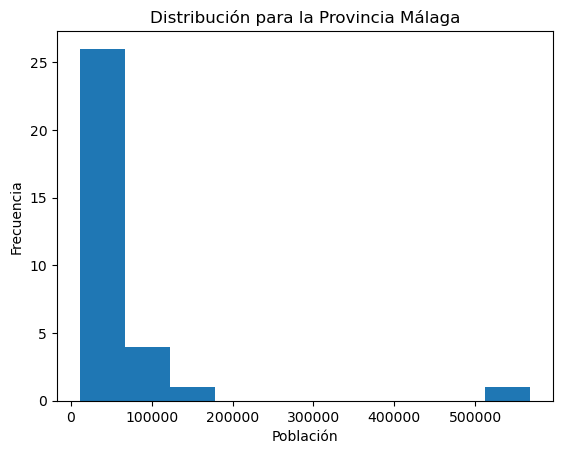

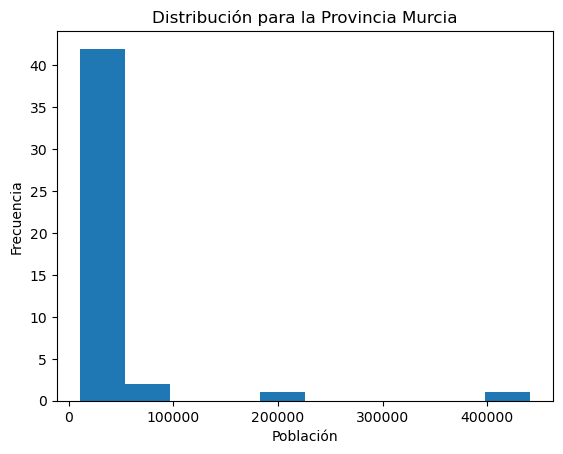

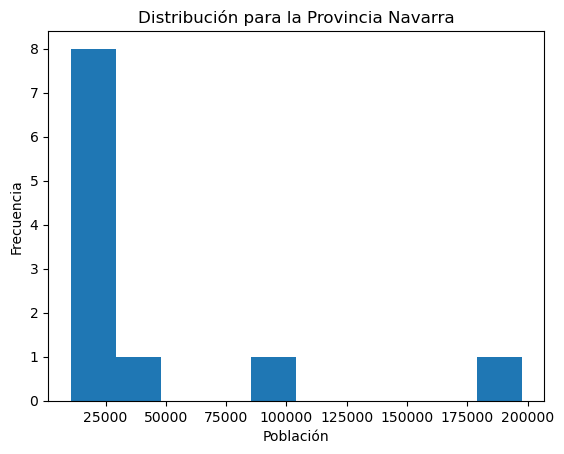

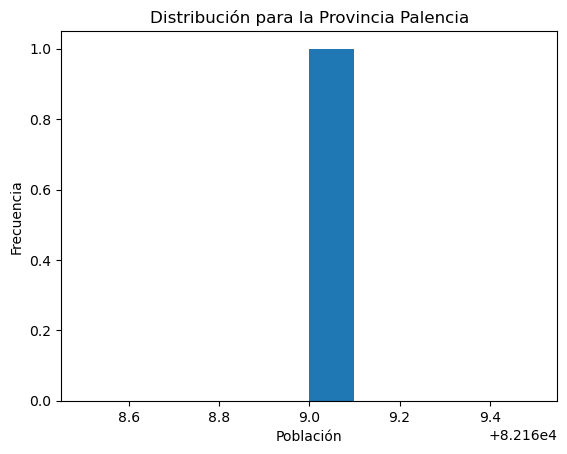

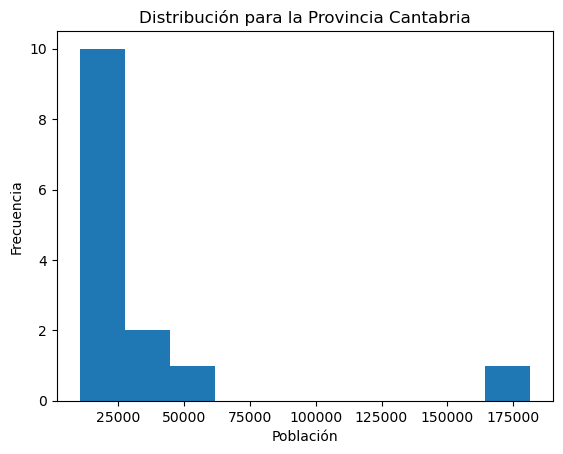

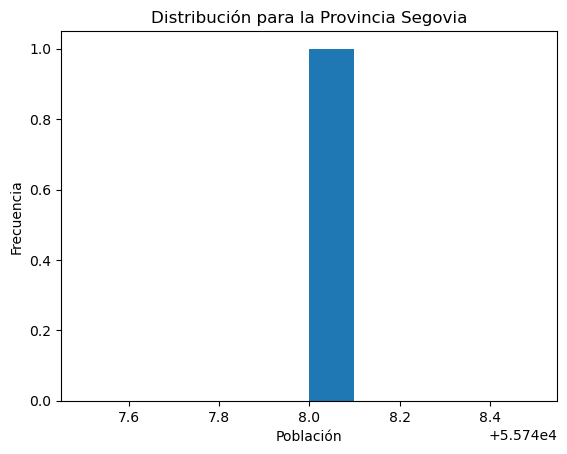

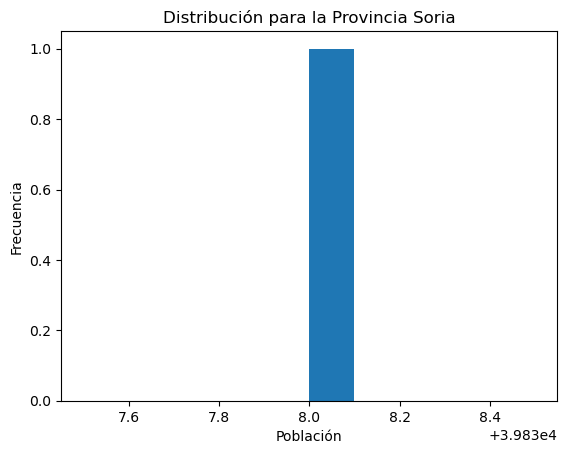

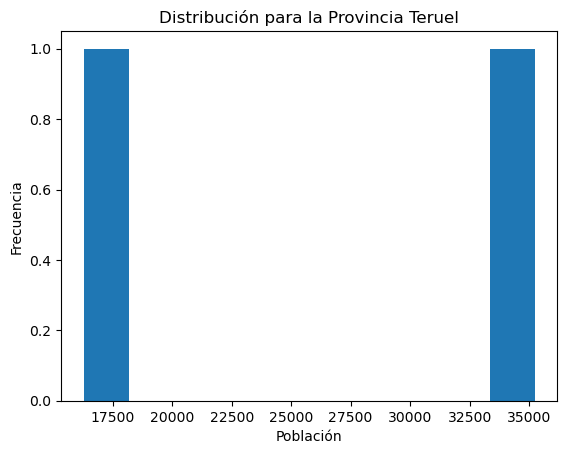

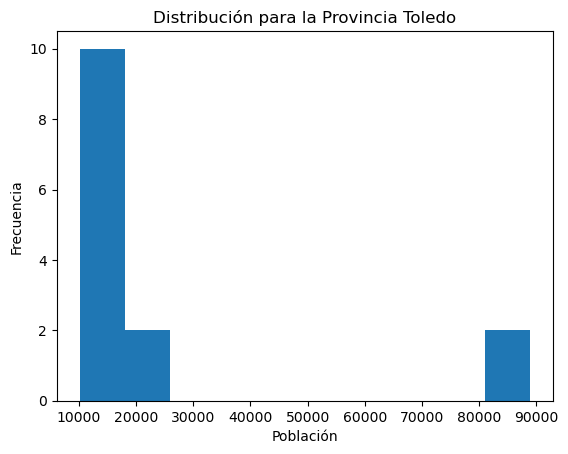

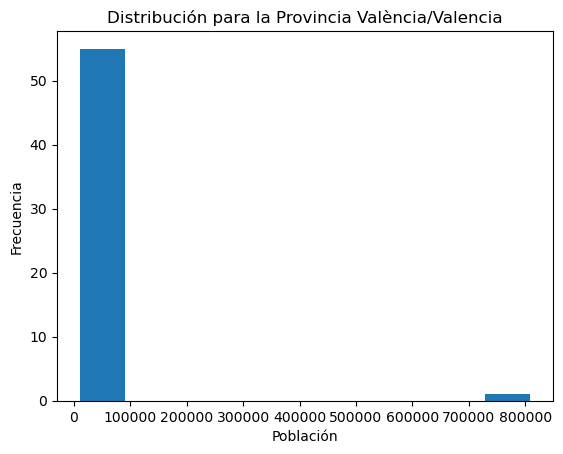

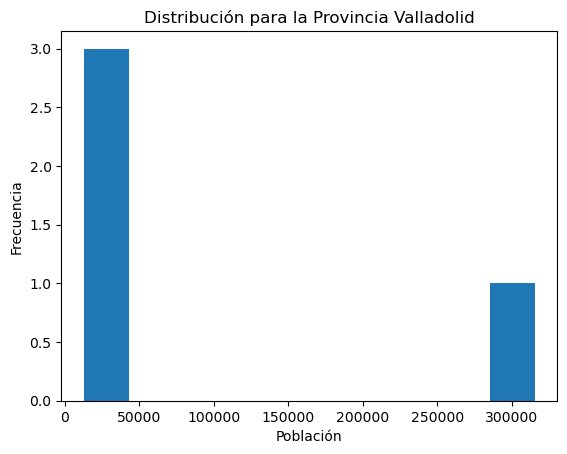

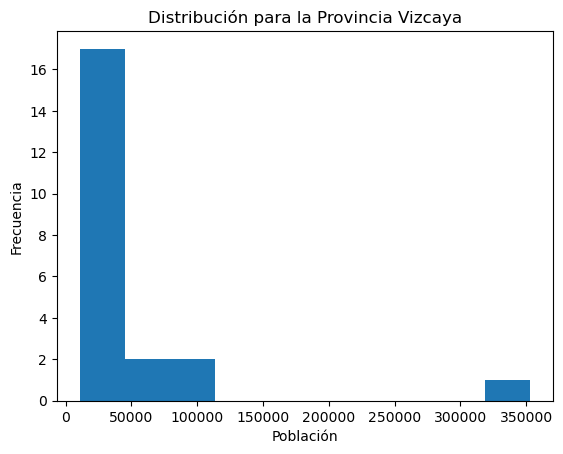

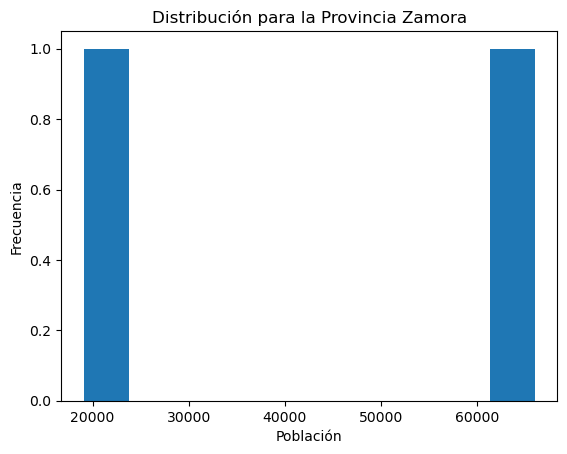

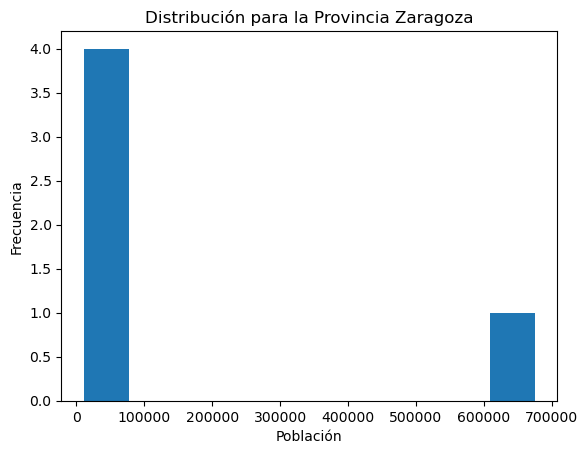

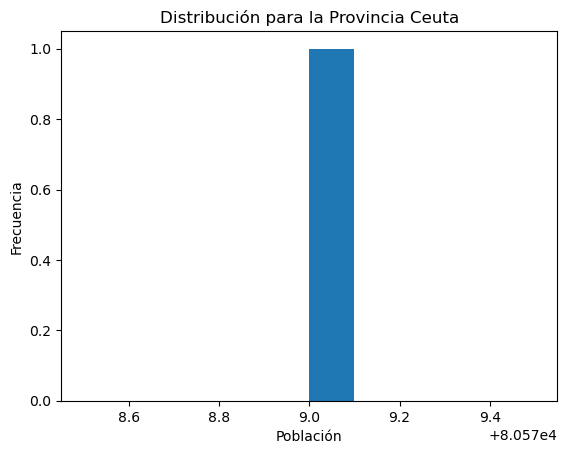

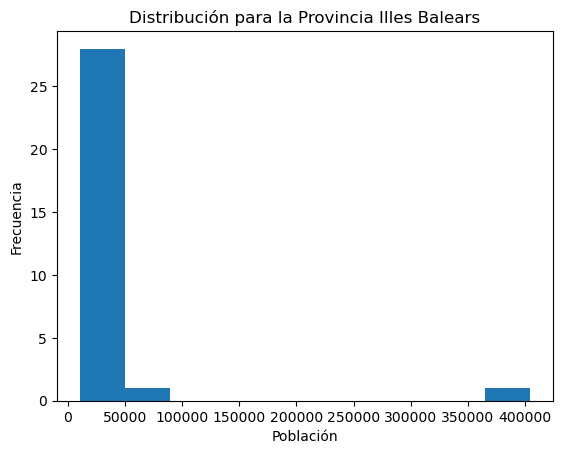

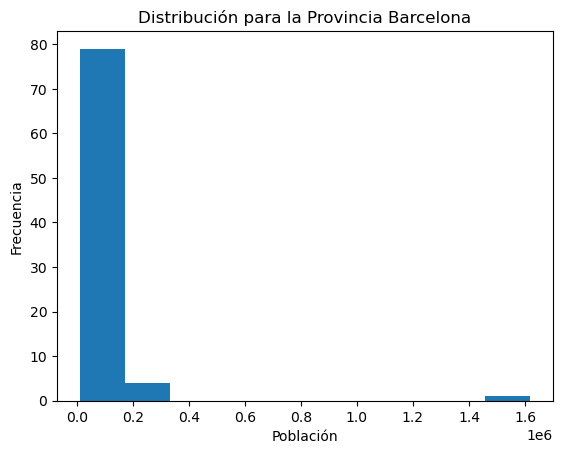

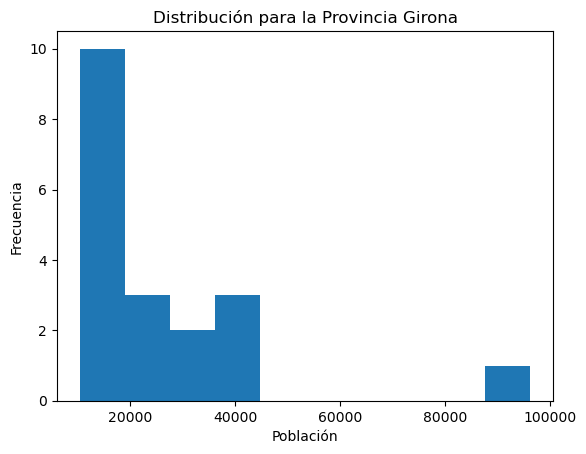

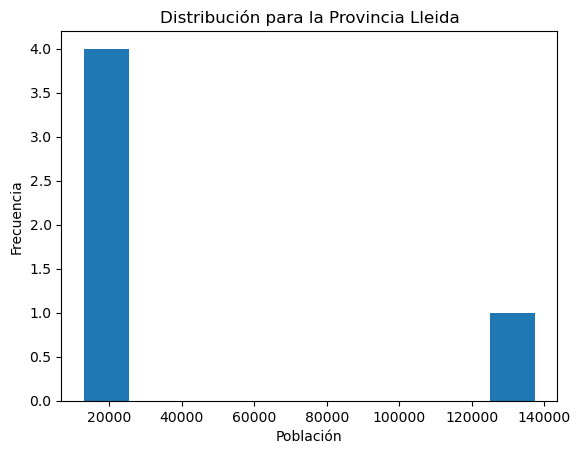

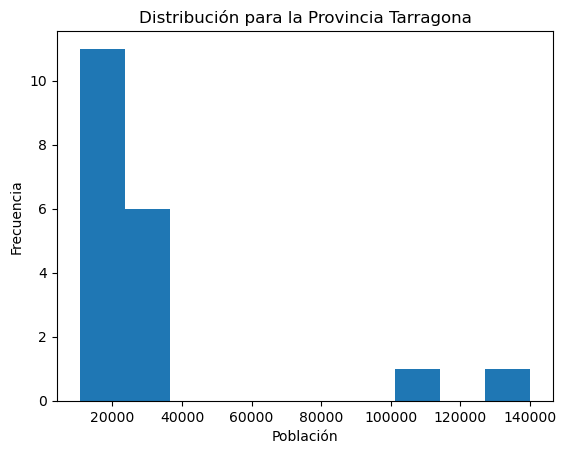

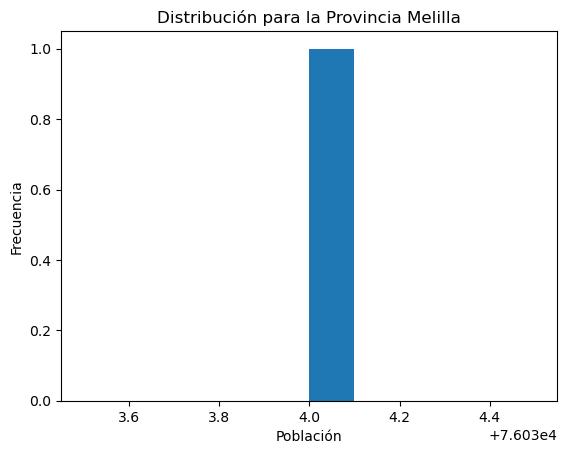

In [106]:
# Se obtienen las provincias del dataset
provs = df['Provincia'].unique()

# Se crean los histogramas de población para cada provincia
for province in provs:
    # Se filtran los municipios por provincia
    cities = df[df['Provincia'] == province]

    # Se crea el histograma de dist de población
    plt.hist(cities['Poblacion'], bins=10)

    # Se configura la gráfica
    plt.title('Distribución para la Provincia ' + province)
    plt.xlabel('Población')
    plt.ylabel('Frecuencia')

    # display the plot
    plt.show()

7. Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?

In [107]:
# Se obtiene una muestra aleatoria de 50 municipios
df_sample = df.sample(n=50, random_state=1)
df_sample

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
528,528,529,Carcaixent,20935.0,46083,Carcaixent,46,València/Valencia,-0.446981,39.122762
560,560,561,Utiel,12421.0,46249,Utiel,46,València/Valencia,-1.205386,39.567155
185,185,186,Orihuela,87113.0,3099,Orihuela,3,Alacant/Alicante,-0.946646,38.085741
791,791,792,Nueva Andalucía,14441.0,29069,Marbella,29,Málaga,-4.975364,36.500653
494,494,495,El Viso del Alcor,18641.0,41102,El Viso del Alcor,41,Sevilla,-5.718532,37.388975
298,298,299,Irun,60938.0,20045,Irun,20,Guipúzcoa,-1.787361,43.340032
844,844,845,San Jose,11905.0,30024,Lorca,30,Murcia,-1.703197,37.668545
784,784,785,La Partija-Santa Monica,57757.0,28123,Rivas-Vaciamadrid,28,Madrid,-3.543108,40.368431
754,754,755,Tamaraceite,25171.0,35016,Las Palmas de Gran Canaria,35,Las Palmas,-15.476377,28.097676
730,730,731,Amposta,21365.0,43014,Amposta,43,Tarragona,0.578310,40.710388


In [109]:
# Resultado de la media
print(f"La media de la muestra es: {df_sample['Poblacion'].mean()}")

La media de la muestra es: 92968.98


In [110]:
# Resultado de la desviacion estandar
print(f"La desviación estándar de la muestra es: {df_sample['Poblacion'].std()}")

La desviación estándar de la muestra es: 459474.0980776001


8. Liste los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [119]:
from math import radians, sin, cos, sqrt, atan2

# Función para calcular la distancia entre 2 puntos usando la fórmula del semiverseno
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    a = sin(dLat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dLon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

# Función para encontrar la ciudad más cercana y lejana para una ciudad dada
def find_nearest_farthest_cities(df, city_name):
    # Se obtiene la ciudad dada
    city_row = df.loc[df['Municipio'] == city_name].iloc[0]

    # Se calculan las distancias, a excepcion de la ciudad de Madrid
    distances = df[df['Municipio'] != 'Madrid'].apply(lambda row: haversine(city_row['Y'], city_row['X'], row['Y'], row['X']), axis=1)

    # Se copia el dataframe original puesto que se modificará
    dfx = df

    # Se agregan las distancias al nuevo dataframe
    dfx['Distancias'] = distances

    # Se obtiene la ciudad más cercana
    nearest_city = dfx.loc[df['Distancias'] == distances.min()].iloc[0]

    # Se obtiene la ciudad más lejana
    farthest_city = dfx.loc[df['Distancias'] == distances.max()].iloc[0]

    return (nearest_city['Municipio'], farthest_city['Municipio'])

# Se llama a la función y se le pasa la ciudad de Madrid
nearest_city, farthest_city = find_nearest_farthest_cities(df, 'Madrid')

# Se imprimen los resultados
print('Ciudad más cercana a Madrid: ', nearest_city)
print('Ciudad más lejana a Madrid: ', farthest_city)

Ciudad más cercana a Madrid:  Pozuelo de Alarcón
Ciudad más lejana a Madrid:  Los Llanos de Aridane
